In [1]:
#Importing data(Using SubTask1- Restaurants Data)

import pandas as pd

data = pd.read_csv("SE16T6_Rest_Data.csv",encoding='UTF-8')

In [2]:
data.head()

,RID,SID,text,polarity,category,aspect_term,aspect_category
0,1004293,1004293:0,Judging from previous posts this used to be a ...,negative,RESTAURANT#GENERAL,RESTAURANT,GENERAL
1,1004293,1004293:1,"We, there were four of us, arrived at noon - t...",negative,SERVICE#GENERAL,SERVICE,GENERAL
2,1004293,1004293:2,"They never brought us complimentary noodles, i...",negative,FOOD#QUALITY,FOOD,QUALITY
3,1004293,1004293:3,The food was lousy - too sweet or too salty an...,negative,FOOD#STYLE_OPTIONS,FOOD,STYLE_OPTIONS
4,1004293,1004293:4,"After all that, they complained to me about th...",NaN,NaN,NaN,NaN


In [3]:
data = data.dropna(subset=['category'])

In [4]:
data.shape

(1347, 7)

In [5]:
#Eliminating punctuations

import string
import re

punctuations = string.punctuation 
punctuations_pattern = r"[{}]".format(punctuations)

data['text'] = data.apply(lambda row: ' '.join(re.sub(punctuations_pattern,"",row["text"]).split()), axis=1)

In [6]:
#Sentence tokenization

import nltk

sent_tokens = data.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1)

sent_tokens

0       [Judging from previous posts this used to be a...
1       [We there were four of us arrived at noon the ...
2       [They never brought us complimentary noodles i...
3       [The food was lousy too sweet or too salty and...
6       [I have eaten at Saul many times the food is a...
7       [Saul is the best restaurant on Smith Street a...
8       [The duck confit is always amazing and the foi...
9       [The wine list is interesting and has many goo...
10      [For the price you cannot eat this well in Man...
11      [Went on a 3 day oyster binge with Fish bringi...
12      [Service was devine oysters where a sensual as...
13                               [You cant go wrong here]
14      [Every time in New York I make it a point to v...
15      [Everything is always cooked to perfection the...
16      [I had the duck breast special on my last visi...
17                     [Cant wait wait for my next visit]
18      [We ate outside at Harus Sake bar because Haru...
19            

In [7]:
len(sent_tokens)

1347

In [8]:
#Merging into a single document for data cleaning

import itertools

doc_complete = list(itertools.chain.from_iterable(list(sent_tokens)))

doc_complete

['Judging from previous posts this used to be a good place but not any longer',
 'We there were four of us arrived at noon the place was empty and the staff acted like we were imposing on them and they were very rude',
 'They never brought us complimentary noodles ignored repeated requests for sugar and threw our dishes on the table',
 'The food was lousy too sweet or too salty and the portions tiny',
 'I have eaten at Saul many times the food is always consistently outrageously good',
 'Saul is the best restaurant on Smith Street and in Brooklyn',
 'The duck confit is always amazing and the foie gras terrine with figs was out of this world',
 'The wine list is interesting and has many good values',
 'For the price you cannot eat this well in Manhattan',
 'Went on a 3 day oyster binge with Fish bringing up the closing and I am so glad this was the place it O trip ended because it was so great',
 'Service was devine oysters where a sensual as they come and the price cant be beat',
 'You

In [9]:
#Cleaning data(Removal of stop words and punctuations)

import string
from nltk.stem import WordNetLemmatizer 
import gensim
  
lemmatizer = WordNetLemmatizer()



stop = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours',
         'yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself',
         'they','the','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these',
         'those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing',
         'a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against',
         'between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off',
         'over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each',
         'few','more','most','other','some','such','only','own','same','so','than','too','very','s','t','can','will','just',
         'don',"don't",'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren']

def bigrams(words, bi_min=15, tri_min=10):
        bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    lemmatized = ''.join(lemmatizer.lemmatize(word) for word in stop_free)
    bigram_mod = bigrams(lemmatized)
    bigram = ''.join(bigram_mod[lemmatized])
    #print(bigram)
    return bigram

data_clean = [clean(doc).split() for doc in doc_complete]

In [14]:
data_clean

[['judging', 'previous', 'posts', 'used', 'good', 'place', 'not', 'longer'],
 ['four',
  'us',
  'arrived',
  'noon',
  'place',
  'empty',
  'staff',
  'acted',
  'like',
  'imposing',
  'rude'],
 ['never',
  'brought',
  'us',
  'complimentary',
  'noodles',
  'ignored',
  'repeated',
  'requests',
  'sugar',
  'threw',
  'dishes',
  'table'],
 ['food', 'lousy', 'sweet', 'salty', 'portions', 'tiny'],
 ['eaten',
  'saul',
  'many',
  'times',
  'food',
  'always',
  'consistently',
  'outrageously',
  'good'],
 ['saul', 'best', 'restaurant', 'smith', 'street', 'brooklyn'],
 ['duck',
  'confit',
  'always',
  'amazing',
  'foie',
  'gras',
  'terrine',
  'figs',
  'world'],
 ['wine', 'list', 'interesting', 'many', 'good', 'values'],
 ['price', 'cannot', 'eat', 'well', 'manhattan'],
 ['went',
  '3',
  'day',
  'oyster',
  'binge',
  'fish',
  'bringing',
  'closing',
  'glad',
  'place',
  'trip',
  'ended',
  'great'],
 ['service', 'devine', 'oysters', 'sensual', 'come', 'price', 'cant

In [15]:
len(data_clean)

1347

In [16]:
#Forming a list of terms(vocab)
import itertools

words = list(itertools.chain.from_iterable(data_clean))

In [17]:
#Finding POS

pos = nltk.pos_tag(words)

In [18]:
pos

[('judging', 'VBG'),
 ('previous', 'JJ'),
 ('posts', 'NNS'),
 ('used', 'VBD'),
 ('good', 'JJ'),
 ('place', 'NN'),
 ('not', 'RB'),
 ('longer', 'RB'),
 ('four', 'CD'),
 ('us', 'PRP'),
 ('arrived', 'VBD'),
 ('noon', 'JJ'),
 ('place', 'NN'),
 ('empty', 'JJ'),
 ('staff', 'NN'),
 ('acted', 'VBN'),
 ('like', 'IN'),
 ('imposing', 'VBG'),
 ('rude', 'NN'),
 ('never', 'RB'),
 ('brought', 'VBD'),
 ('us', 'PRP'),
 ('complimentary', 'JJ'),
 ('noodles', 'NNS'),
 ('ignored', 'VBN'),
 ('repeated', 'JJ'),
 ('requests', 'NNS'),
 ('sugar', 'NN'),
 ('threw', 'VBD'),
 ('dishes', 'NNS'),
 ('table', 'JJ'),
 ('food', 'NN'),
 ('lousy', 'JJ'),
 ('sweet', 'NN'),
 ('salty', 'NN'),
 ('portions', 'NNS'),
 ('tiny', 'VBP'),
 ('eaten', 'JJ'),
 ('saul', 'RB'),
 ('many', 'JJ'),
 ('times', 'NNS'),
 ('food', 'NN'),
 ('always', 'RB'),
 ('consistently', 'RB'),
 ('outrageously', 'RB'),
 ('good', 'JJ'),
 ('saul', 'NN'),
 ('best', 'RBS'),
 ('restaurant', 'NN'),
 ('smith', 'JJ'),
 ('street', 'NN'),
 ('brooklyn', 'JJ'),
 ('duck',

In [27]:
import csv

# data=[('smith, bob',2),('carol',3),('ted',4),('alice',5)]

with open('POS.csv','w',encoding='utf-8') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['word','tag'])
    for row in POS:
        csv_out.writerow(row)

NameError: name 'POS' is not defined

In [28]:
POS = pd.read_csv('POS.csv')

In [29]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [30]:
POS[POS['tag']=='WRB']['word']

Series([], Name: word, dtype: object)

In [31]:
POS

,word,tag


In [32]:
pos = dict(pos)

In [33]:
pos

{'judging': 'VBG',
 'previous': 'JJ',
 'posts': 'NNS',
 'used': 'VBD',
 'good': 'JJ',
 'place': 'NN',
 'not': 'RB',
 'longer': 'RBR',
 'four': 'CD',
 'us': 'PRP',
 'arrived': 'VBD',
 'noon': 'JJ',
 'empty': 'JJ',
 'staff': 'NN',
 'acted': 'VBN',
 'like': 'IN',
 'imposing': 'VBG',
 'rude': 'JJ',
 'never': 'RB',
 'brought': 'VBD',
 'complimentary': 'VBP',
 'noodles': 'NNS',
 'ignored': 'VBN',
 'repeated': 'JJ',
 'requests': 'NNS',
 'sugar': 'NN',
 'threw': 'VBD',
 'dishes': 'NNS',
 'table': 'NN',
 'food': 'NN',
 'lousy': 'JJ',
 'sweet': 'JJ',
 'salty': 'NN',
 'portions': 'NNS',
 'tiny': 'JJ',
 'eaten': 'RB',
 'saul': 'JJ',
 'many': 'JJ',
 'times': 'NNS',
 'always': 'RB',
 'consistently': 'RB',
 'outrageously': 'RB',
 'best': 'JJS',
 'restaurant': 'NN',
 'smith': 'JJ',
 'street': 'NN',
 'brooklyn': 'NN',
 'duck': 'NN',
 'confit': 'NN',
 'amazing': 'VBG',
 'foie': 'NN',
 'gras': 'NNS',
 'terrine': 'VBP',
 'figs': 'JJ',
 'world': 'NN',
 'wine': 'JJ',
 'list': 'NN',
 'interesting': 'JJ',
 'v

In [34]:
data_final=[]
sent = []

for sentence in data_clean:
    words=[]
    for term in sentence:
        #sent = sentence
        if pos[term] not in ['CC','CD','DT','EX','IN','JJS','MD','PRP','PRP$','RBS','RP','TO','UH','WDT','WP','WRB']:
            words.append(term)
    data_final.append(words)

In [35]:
data_clean

[['judging', 'previous', 'posts', 'used', 'good', 'place', 'not', 'longer'],
 ['four',
  'us',
  'arrived',
  'noon',
  'place',
  'empty',
  'staff',
  'acted',
  'like',
  'imposing',
  'rude'],
 ['never',
  'brought',
  'us',
  'complimentary',
  'noodles',
  'ignored',
  'repeated',
  'requests',
  'sugar',
  'threw',
  'dishes',
  'table'],
 ['food', 'lousy', 'sweet', 'salty', 'portions', 'tiny'],
 ['eaten',
  'saul',
  'many',
  'times',
  'food',
  'always',
  'consistently',
  'outrageously',
  'good'],
 ['saul', 'best', 'restaurant', 'smith', 'street', 'brooklyn'],
 ['duck',
  'confit',
  'always',
  'amazing',
  'foie',
  'gras',
  'terrine',
  'figs',
  'world'],
 ['wine', 'list', 'interesting', 'many', 'good', 'values'],
 ['price', 'cannot', 'eat', 'well', 'manhattan'],
 ['went',
  '3',
  'day',
  'oyster',
  'binge',
  'fish',
  'bringing',
  'closing',
  'glad',
  'place',
  'trip',
  'ended',
  'great'],
 ['service', 'devine', 'oysters', 'sensual', 'come', 'price', 'cant

In [36]:
data_final

[['judging', 'previous', 'posts', 'used', 'good', 'place', 'not', 'longer'],
 ['arrived', 'noon', 'place', 'empty', 'staff', 'acted', 'imposing', 'rude'],
 ['never',
  'brought',
  'complimentary',
  'noodles',
  'ignored',
  'repeated',
  'requests',
  'sugar',
  'threw',
  'dishes',
  'table'],
 ['food', 'lousy', 'sweet', 'salty', 'portions', 'tiny'],
 ['eaten',
  'saul',
  'many',
  'times',
  'food',
  'always',
  'consistently',
  'outrageously',
  'good'],
 ['saul', 'restaurant', 'smith', 'street', 'brooklyn'],
 ['duck',
  'confit',
  'always',
  'amazing',
  'foie',
  'gras',
  'terrine',
  'figs',
  'world'],
 ['wine', 'list', 'interesting', 'many', 'good', 'values'],
 ['price', 'cannot', 'eat', 'well', 'manhattan'],
 ['went',
  'day',
  'oyster',
  'binge',
  'fish',
  'bringing',
  'closing',
  'glad',
  'place',
  'trip',
  'ended',
  'great'],
 ['service', 'devine', 'oysters', 'sensual', 'come', 'price', 'cant', 'beat'],
 ['cant', 'go', 'wrong'],
 ['time',
  'new',
  'york'

In [37]:
#Preparing Document-Term Matrix

# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_final)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_final]

In [38]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)

In [39]:
# Print the Keyword in the 10 topics
print(ldamodel.print_topics())
#doc_lda = lda_model[corpus]

[(0, '0.021*"food" + 0.012*"ive" + 0.012*"thai" + 0.009*"ordered" + 0.009*"delicious" + 0.009*"love" + 0.009*"menu" + 0.008*"good" + 0.007*"came" + 0.006*"first"'), (1, '0.034*"food" + 0.033*"good" + 0.027*"service" + 0.024*"restaurant" + 0.023*"place" + 0.013*"not" + 0.008*"always" + 0.008*"great" + 0.007*"nice" + 0.007*"prices"'), (2, '0.014*"not" + 0.013*"food" + 0.010*"sushi" + 0.009*"got" + 0.008*"excellent" + 0.006*"well" + 0.006*"time" + 0.006*"pizza" + 0.005*"always" + 0.005*"fresh"'), (3, '0.016*"not" + 0.013*"food" + 0.012*"go" + 0.008*"service" + 0.008*"times" + 0.007*"well" + 0.007*"also" + 0.007*"fresh" + 0.007*"hot" + 0.006*"experience"'), (4, '0.061*"great" + 0.034*"place" + 0.028*"food" + 0.015*"service" + 0.010*"not" + 0.010*"dont" + 0.010*"staff" + 0.009*"worth" + 0.009*"good" + 0.008*"even"'), (5, '0.013*"not" + 0.011*"attentive" + 0.010*"went" + 0.007*"place" + 0.007*"last" + 0.007*"back" + 0.006*"night" + 0.006*"pizza" + 0.005*"la" + 0.005*"staff"')]


In [40]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_final, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.717353300117099

Coherence Score:  0.4576627705446323


In [41]:
# Visualize the topics
#to examine the produced topics and the associated keywords
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

C:\Users\BrontoByte\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.119811  0.035303       1        1  25.761002
4      0.109725 -0.083877       2        1  19.663502
2     -0.030142  0.024994       3        1  15.479800
3     -0.032851  0.121856       4        1  15.120313
0     -0.068306  0.002543       5        1  12.701541
5     -0.098236 -0.100817       6        1  11.273847, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
67    Default  116.000000            great  116.000000  30.0000  30.0000
4     Default  119.000000            place  119.000000  29.0000  29.0000
0     Default  101.000000             good  101.000000  28.0000  28.0000
77    Default   94.000000          service   94.000000  27.0000  27.0000
40    Default   67.000000       restaurant   67.000000  26.0000  26.0000
26    Default  170.000000             food  170.000000  25.0000  25.0000
330   Default   17.000000             thai   17.000000  24.0000  24.0000
132   Default   12.000000        attentive   12.000000  23.0000  23.0000
242   Default   22.000000              ive   22.000000  22.0000  22.0000
258   Default   19.000000            worth   19.000000  21.0000  21.0000
3     Default   92.000000              not   92.000000  20.0000  20.0000
573   Default   13.000000          ordered   13.000000  19.0000  19.0000
234   Default   21.000000             even   21.000000  18.0000  18.0000
180   Default   20.000000             dont   20.000000  17.0000  17.0000
143   Default   15.000000              got   15.000000  16.0000  16.0000
660   Default   16.000000            fresh   16.000000  15.0000  15.0000
359   Default   10.000000             came   10.000000  14.0000  14.0000
693   Default   14.000000              hot   14.000000  13.0000  13.0000
248   Default   22.000000             menu   22.000000  12.0000  12.0000
70    Default   27.000000             went   27.000000  11.0000  11.0000
329   Default   28.000000            sushi   28.000000  10.0000  10.0000
32    Default   32.000000           always   32.000000   9.0000   9.0000
14    Default   26.000000            staff   26.000000   8.0000   8.0000
38    Default   20.000000            times   20.000000   7.0000   7.0000
59    Default   23.000000             well   23.000000   6.0000   6.0000
178   Default   15.000000             also   15.000000   5.0000   5.0000
125   Default   19.000000             love   19.000000   4.0000   4.0000
764   Default    6.000000        authentic    6.000000   3.0000   3.0000
255   Default   24.000000           really   24.000000   2.0000   2.0000
281   Default   21.000000           prices   21.000000   1.0000   1.0000
318    Topic1    5.732096           prompt    6.364690   1.2516  -5.8982
587    Topic1    5.731562         pleasant    6.364633   1.2515  -5.8983
390    Topic1    4.932949      recommended    5.564796   1.2358  -6.0484
1582   Topic1    4.930188          overall    5.564384   1.2353  -6.0489
304    Topic1    8.134205              fun    9.528142   1.1981  -5.5482
435    Topic1   11.331604         romantic   13.426303   1.1867  -5.2167
33     Topic1    3.332963     consistently    3.964809   1.1827  -6.4404
367    Topic1    3.332193           matter    3.964704   1.1825  -6.4407
119    Topic1    3.331579            share    3.964596   1.1824  -6.4409
981    Topic1    3.307619      exceptional    3.962526   1.1757  -6.4481
634    Topic1    2.532987             type    3.164831   1.1336  -6.7149
1483   Topic1    2.532966            gross    3.164813   1.1336  -6.7149
936    Topic1    2.532963            liked    3.164809   1.1336  -6.7149
41     Topic1    2.532970            smith    3.164819   1.1336  -6.7149
691    Topic1    2.532962         vacation    3.164809   1.1336  -6.7149
1188   Topic1    2.532940         mediocre    3.164790   1.1336  -6.7149
156    Topic1    2.53

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

### TF-IDF Vectorization

In [43]:
data_final

[['judging', 'previous', 'posts', 'used', 'good', 'place', 'not', 'longer'],
 ['arrived', 'noon', 'place', 'empty', 'staff', 'acted', 'imposing', 'rude'],
 ['never',
  'brought',
  'complimentary',
  'noodles',
  'ignored',
  'repeated',
  'requests',
  'sugar',
  'threw',
  'dishes',
  'table'],
 ['food', 'lousy', 'sweet', 'salty', 'portions', 'tiny'],
 ['eaten',
  'saul',
  'many',
  'times',
  'food',
  'always',
  'consistently',
  'outrageously',
  'good'],
 ['saul', 'restaurant', 'smith', 'street', 'brooklyn'],
 ['duck',
  'confit',
  'always',
  'amazing',
  'foie',
  'gras',
  'terrine',
  'figs',
  'world'],
 ['wine', 'list', 'interesting', 'many', 'good', 'values'],
 ['price', 'cannot', 'eat', 'well', 'manhattan'],
 ['went',
  'day',
  'oyster',
  'binge',
  'fish',
  'bringing',
  'closing',
  'glad',
  'place',
  'trip',
  'ended',
  'great'],
 ['service', 'devine', 'oysters', 'sensual', 'come', 'price', 'cant', 'beat'],
 ['cant', 'go', 'wrong'],
 ['time',
  'new',
  'york'

In [44]:
corpus = []
for doc in data_final:
    document = ' '.join(doc)
    corpus.append(document)
    document=[]

In [45]:
corpus

['judging previous posts used good place not longer',
 'arrived noon place empty staff acted imposing rude',
 'never brought complimentary noodles ignored repeated requests sugar threw dishes table',
 'food lousy sweet salty portions tiny',
 'eaten saul many times food always consistently outrageously good',
 'saul restaurant smith street brooklyn',
 'duck confit always amazing foie gras terrine figs world',
 'wine list interesting many good values',
 'price cannot eat well manhattan',
 'went day oyster binge fish bringing closing glad place trip ended great',
 'service devine oysters sensual come price cant beat',
 'cant go wrong',
 'time new york make point visit restaurant saul smith street',
 'everything always cooked perfection service excellent decor cool understated',
 'duck breast special last visit incredible',
 'cant wait wait visit',
 'ate harus sake bar harus restaurant door overflowing',
 'whats difference',
 'sake list extensive looking purple haze wasnt listed made upon 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)


['aback', 'able', 'aboveaverage', 'abrupt', 'absolutely', 'abused', 'accident', 'accidentally', 'accidently', 'accolades', 'accomodating', 'accompaniment', 'acknowledgement', 'acquiring', 'act', 'acted', 'action', 'actors', 'actually', 'add', 'additions', 'adds', 'adequately', 'adjust', 'admittedly', 'adn', 'adventure', 'advice', 'aesthetic', 'affordable', 'afortune', 'afternoon', 'aftertheatre', 'aggressively', 'agree', 'ahhh', 'al', 'alice', 'alive', 'alked', 'allergies', 'allowed', 'allucaneat', 'almost', 'alone', 'alot', 'alright', 'also', 'alternative', 'always', 'amanzing', 'amazed', 'amazin', 'amazing', 'ambiance', 'ambience', 'ambient', 'amex', 'amma', 'amount', 'andor', 'angry', 'anniversary', 'annoying', 'anticipating', 'antipasta', 'antipasti', 'anybody', 'anyone', 'anything', 'anywhere', 'apart', 'apologize', 'apologized', 'apology', 'apparently', 'appear', 'appears', 'appetizer', 'appetizers', 'apppetizers', 'appreciate', 'appropriate', 'approximately', 'apps', 'area', 'ar

In [47]:
X.shape

(1347, 2410)

In [48]:
data.head()

,RID,SID,text,polarity,category,aspect_term,aspect_category
0,1004293,1004293:0,Judging from previous posts this used to be a ...,negative,RESTAURANT#GENERAL,RESTAURANT,GENERAL
1,1004293,1004293:1,We there were four of us arrived at noon the p...,negative,SERVICE#GENERAL,SERVICE,GENERAL
2,1004293,1004293:2,They never brought us complimentary noodles ig...,negative,FOOD#QUALITY,FOOD,QUALITY
3,1004293,1004293:3,The food was lousy too sweet or too salty and ...,negative,FOOD#STYLE_OPTIONS,FOOD,STYLE_OPTIONS
6,1014458,1014458:0,I have eaten at Saul many times the food is al...,positive,FOOD#QUALITY,FOOD,QUALITY


In [49]:
1950-603

1347

In [50]:
len(data_final)

1347

In [51]:
data["category"] = data["category"].astype('category')

data["category_cat"] = data["category"].cat.codes
data.head()

,RID,SID,text,polarity,category,aspect_term,aspect_category,category_cat
0,1004293,1004293:0,Judging from previous posts this used to be a ...,negative,RESTAURANT#GENERAL,RESTAURANT,GENERAL,8
1,1004293,1004293:1,We there were four of us arrived at noon the p...,negative,SERVICE#GENERAL,SERVICE,GENERAL,11
2,1004293,1004293:2,They never brought us complimentary noodles ig...,negative,FOOD#QUALITY,FOOD,QUALITY,5
3,1004293,1004293:3,The food was lousy too sweet or too salty and ...,negative,FOOD#STYLE_OPTIONS,FOOD,STYLE_OPTIONS,6
6,1014458,1014458:0,I have eaten at Saul many times the food is al...,positive,FOOD#QUALITY,FOOD,QUALITY,5


In [52]:
data[data['category_cat']==11].head()

,RID,SID,text,polarity,category,aspect_term,aspect_category,category_cat
1,1004293,1004293:1,We there were four of us arrived at noon the p...,negative,SERVICE#GENERAL,SERVICE,GENERAL,11
12,1028246,1028246:1,Service was devine oysters where a sensual as ...,positive,SERVICE#GENERAL,SERVICE,GENERAL,11
16,1032695,1032695:2,I had the duck breast special on my last visit...,positive,SERVICE#GENERAL,SERVICE,GENERAL,11
19,1053543,1053543:1,Whats the difference between the two,positive,SERVICE#GENERAL,SERVICE,GENERAL,11
25,1055910,1055910:2,Foodawesome,positive,SERVICE#GENERAL,SERVICE,GENERAL,11


In [53]:
['AMBIENCE#GENERAL','DRINKS#PRICES','DRINKS#QUALITY','DRINKS#STYLE_OPTIONS','FOOD#PRICES','FOOD#QUALITY','FOOD#STYLE_OPTIONS','LOCATION#GENERAL','RESTAURANT#GENERAL','RESTAURANT#MISCELLANEOUS','RESTAURANT#PRICES','SERVICE#GENERAL']

['AMBIENCE#GENERAL',
 'DRINKS#PRICES',
 'DRINKS#QUALITY',
 'DRINKS#STYLE_OPTIONS',
 'FOOD#PRICES',
 'FOOD#QUALITY',
 'FOOD#STYLE_OPTIONS',
 'LOCATION#GENERAL',
 'RESTAURANT#GENERAL',
 'RESTAURANT#MISCELLANEOUS',
 'RESTAURANT#PRICES',
 'SERVICE#GENERAL']

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Y = data["category_cat"]
#Y = mbti_preprocessed['I-E']
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


clf = MultinomialNB().fit(X_train,y_train)
pred=clf.predict(X_test)


from sklearn.metrics import confusion_matrix
prediction=confusion_matrix(y_test,pred)
print(prediction)


# evaluate predictions
accuracy = accuracy_score(y_test, pred)
print(accuracy)

[[ 0  0  0  0  0 38  0  0 26  0  0  2]
 [ 0  0  0  0  0  4  0  0  3  0  0  0]
 [ 0  0  0  0  0  3  0  0  5  0  0  0]
 [ 0  0  0  0  0  5  0  0  4  0  0  1]
 [ 0  0  0  0  0 16  0  0  4  0  0  0]
 [ 0  0  0  0  0 65  0  0 35  0  0  2]
 [ 0  0  0  0  0 14  0  0 15  0  0  0]
 [ 0  0  0  0  0  5  0  0  1  0  0  1]
 [ 0  0  0  0  0 55  0  0 41  0  0  3]
 [ 0  0  0  0  0  4  0  0 10  0  0  0]
 [ 0  0  0  0  0 10  0  0  7  0  0  0]
 [ 0  0  0  0  0 36  0  0 28  0  0  2]]
0.24269662921348314


C:\Users\BrontoByte\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


([<matplotlib.axis.YTick at 0x15f162f69e8>,
 <a list of 12 Text yticklabel objects>)

<Figure size 2160x2160 with 0 Axes>

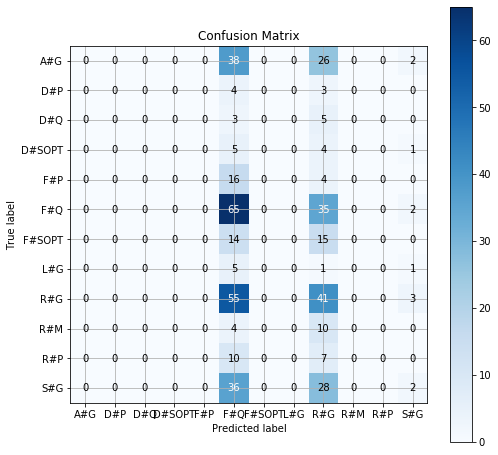

In [251]:
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,30))

skplt.plot_confusion_matrix(y_test, pred,figsize=(8,8))

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])

In [255]:
#Fit the SVM Model
from sklearn import svm

model = svm.SVC(kernel = 'linear')
model.fit(X_train,y_train)
svm_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, svm_pred)
print(accuracy)

0.2786516853932584


C:\Users\BrontoByte\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


([<matplotlib.axis.YTick at 0x15f17c34a20>,
 <a list of 12 Text yticklabel objects>)

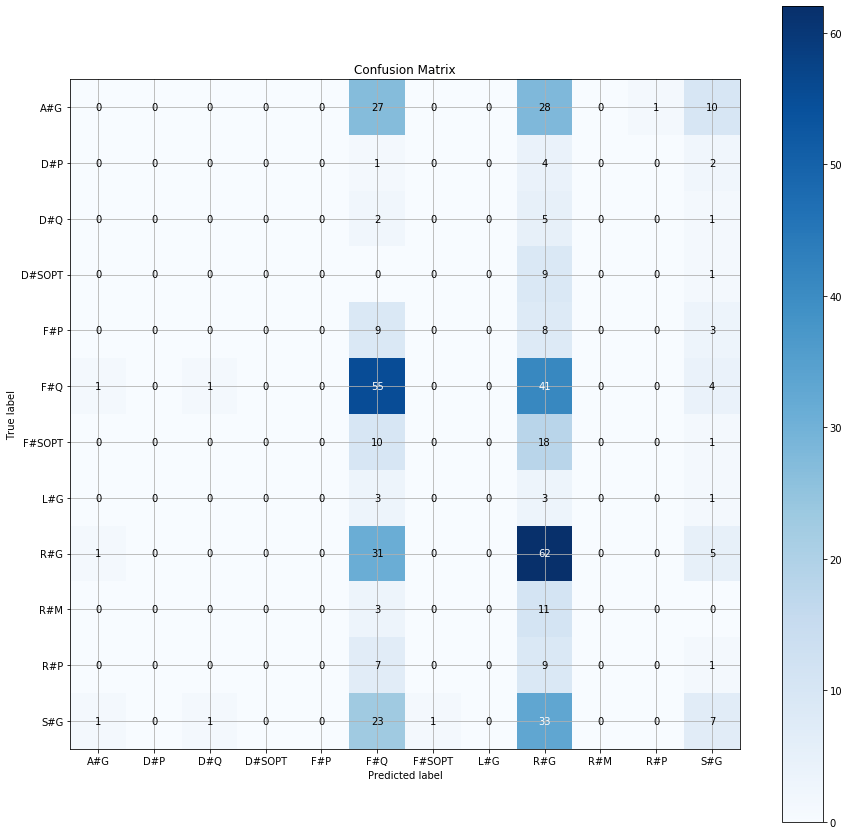

In [285]:
skplt.plot_confusion_matrix(y_test, svm_pred,figsize=(15,15))

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])

In [257]:
from sklearn.metrics import classification_report
print (classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.00      0.00      0.00         7
          2       0.00      0.00      0.00         8
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00        20
          5       0.25      0.64      0.36       102
          6       0.00      0.00      0.00        29
          7       0.00      0.00      0.00         7
          8       0.23      0.41      0.29        99
          9       0.00      0.00      0.00        14
         10       0.00      0.00      0.00        17
         11       0.18      0.03      0.05        66

avg / total       0.14      0.24      0.16       445



C:\Users\BrontoByte\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [258]:
print (classification_report(y_test, svm_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.00      0.00      0.00         7
          2       0.00      0.00      0.00         8
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00        20
          5       0.32      0.54      0.40       102
          6       0.00      0.00      0.00        29
          7       0.00      0.00      0.00         7
          8       0.27      0.63      0.38        99
          9       0.00      0.00      0.00        14
         10       0.00      0.00      0.00        17
         11       0.19      0.11      0.14        66

avg / total       0.16      0.28      0.20       445



C:\Users\BrontoByte\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [342]:
from sklearn.cross_validation import cross_val_score,cross_val_predict

model = svm.SVC(kernel = 'linear')
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.27 (+/- 0.08)


In [343]:
scores

array([0.30496454, 0.22142857, 0.27338129, 0.30147059, 0.31343284,
       0.31578947, 0.21969697, 0.24242424, 0.3129771 , 0.20930233])

In [318]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [319]:
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, rf_pred)
print(accuracy)

0.24044943820224718


C:\Users\BrontoByte\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


([<matplotlib.axis.YTick at 0x15f13d161d0>,
 <a list of 12 Text yticklabel objects>)

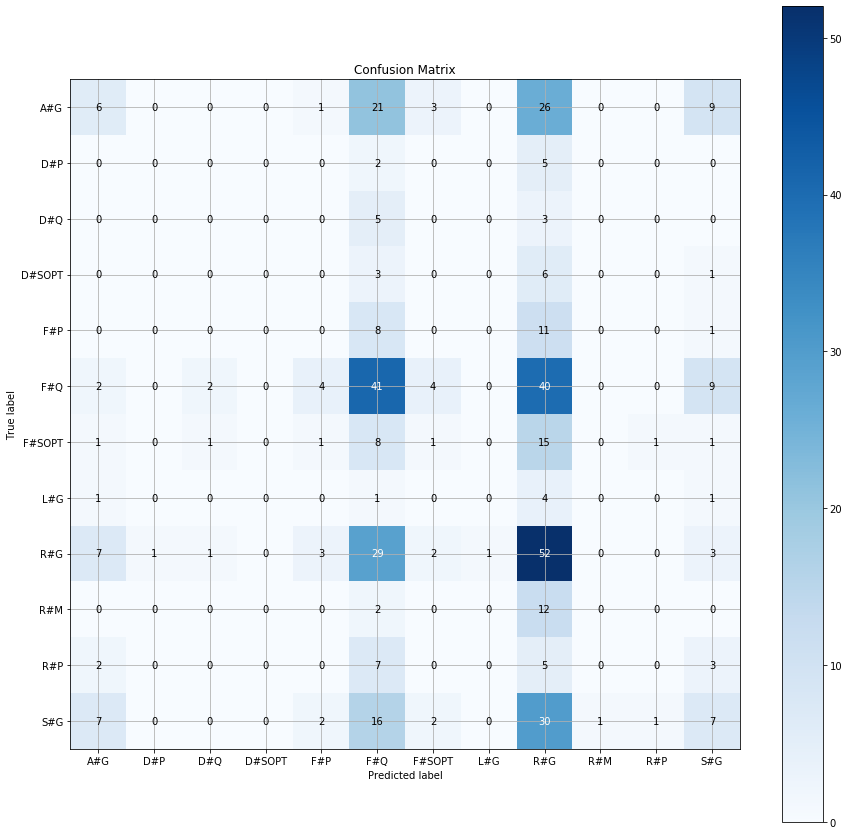

In [320]:
skplt.plot_confusion_matrix(y_test, rf_pred,figsize=(15,15))

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])

In [322]:
print (classification_report(y_test, rf_pred))

             precision    recall  f1-score   support

          0       0.23      0.09      0.13        66
          1       0.00      0.00      0.00         7
          2       0.00      0.00      0.00         8
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00        20
          5       0.29      0.40      0.33       102
          6       0.08      0.03      0.05        29
          7       0.00      0.00      0.00         7
          8       0.25      0.53      0.34        99
          9       0.00      0.00      0.00        14
         10       0.00      0.00      0.00        17
         11       0.20      0.11      0.14        66

avg / total       0.19      0.24      0.19       445



C:\Users\BrontoByte\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
X.shape

(2001, 3192)

In [127]:
Y.shape

(1950,)

In [128]:
data.shape

(1950, 7)

In [129]:
len(data_final)

2001

In [130]:
len(data_clean)

2001

In [261]:
(doc_term_matrix)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(4, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)],
 [(0, 1),
  (26, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1)],
 [(37, 1), (39, 1), (40, 1), (41, 1), (42, 1)],
 [(32, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1)],
 [(0, 1), (35, 1), (51, 1), (52, 1), (53, 1), (54, 1)],
 [(55, 1), (56, 1), (57, 1), (58, 1), (59, 1)],
 [(4, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1)],
 [(58, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)],
 [(72, 1), (78, 1), (79, 1)],
 [(37, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84,

In [272]:
new_data = pd.DataFrame(corpus,columns=['text'])

In [292]:
new_data = new_data.drop(['category'],axis=1)

In [295]:
new_data.head()

,text
0,judging previous posts used good place not longer
1,arrived noon place empty staff acted imposing ...
2,never brought complimentary noodles ignored re...
3,food lousy sweet salty portions tiny
4,eaten saul many times food always consistently...


In [296]:
data = data.reset_index()

In [297]:
new_data['category'] = data['category']

In [298]:
new_data.head()

,text,category
0,judging previous posts used good place not longer,RESTAURANT#GENERAL
1,arrived noon place empty staff acted imposing ...,SERVICE#GENERAL
2,never brought complimentary noodles ignored re...,FOOD#QUALITY
3,food lousy sweet salty portions tiny,FOOD#STYLE_OPTIONS
4,eaten saul many times food always consistently...,FOOD#QUALITY


In [299]:
#To create distinct word cloud for each class

#create unique list of names
UniqueTypes = data.category.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueTypes}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][data.category == key]

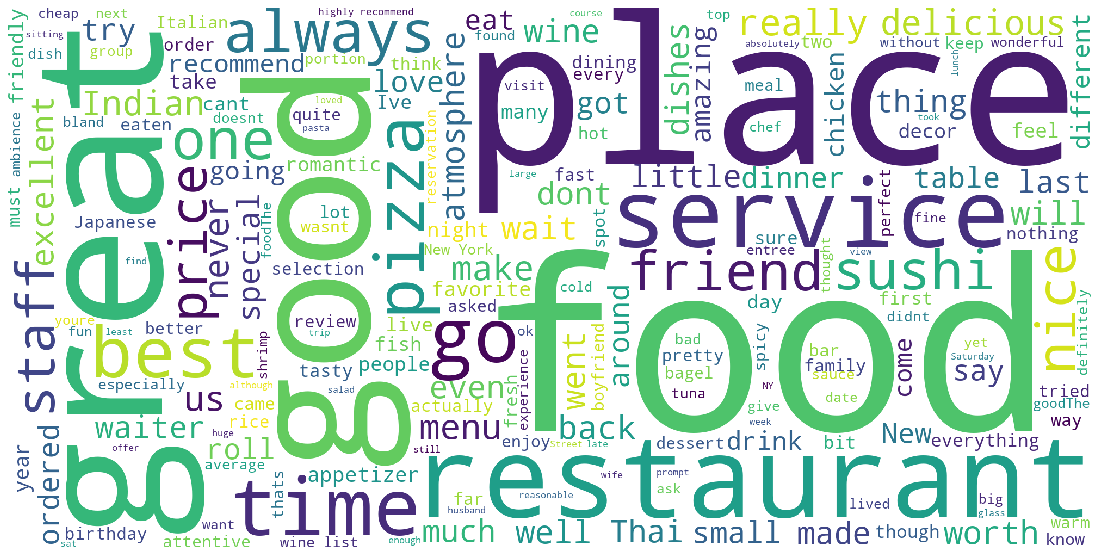

In [300]:
#Creating a wordcloud using all the posts

import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

plt.figure(figsize=(20,10))

wordCloud = WordCloud(background_color="white",width=2000,height=1000,mode="RGB").generate(''.join(data["text"]))
plt.imshow(wordCloud)
plt.axis("off")
plt.show()


In [301]:
pd.unique(new_data.category)

[RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, FOOD#STYLE_OPTIONS, DRINKS#STYLE_OPTIONS, ..., AMBIENCE#GENERAL, RESTAURANT#MISCELLANEOUS, LOCATION#GENERAL, FOOD#PRICES, DRINKS#QUALITY]
Length: 12
Categories (12, object): [RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY, FOOD#STYLE_OPTIONS, ..., RESTAURANT#MISCELLANEOUS, LOCATION#GENERAL, FOOD#PRICES, DRINKS#QUALITY]

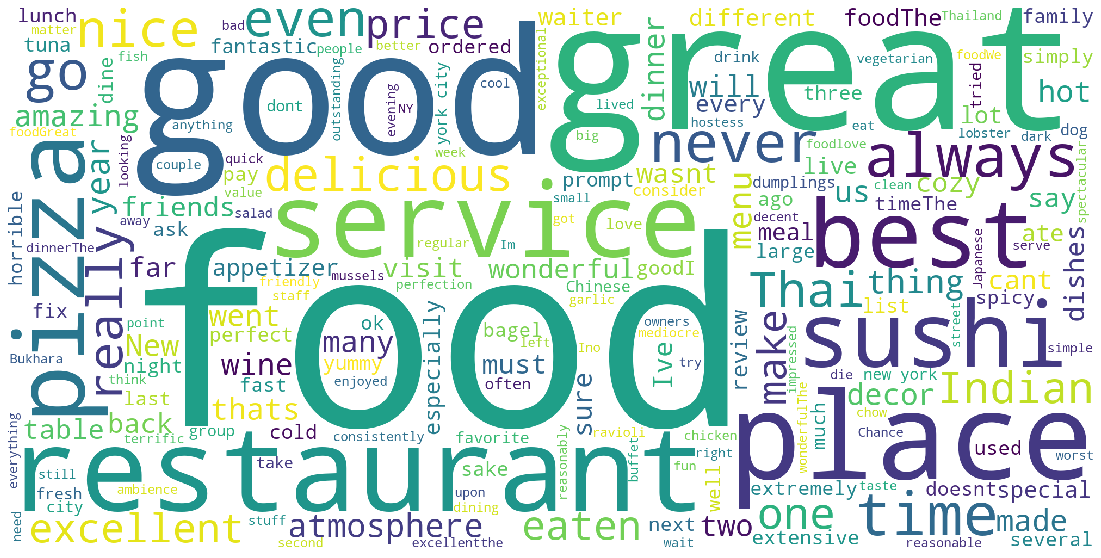

In [302]:
#WordCloud for F#Q

import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

plt.figure(figsize=(20,10))

\wordCloud = WordCloud(background_color="white",width=2000,height=1000,mode="RGB").generate(''.join(DataFrameDict["FOOD#QUALITY"]["text"]))
plt.imshow(wordCloud)
plt.axis("off")
plt.show()

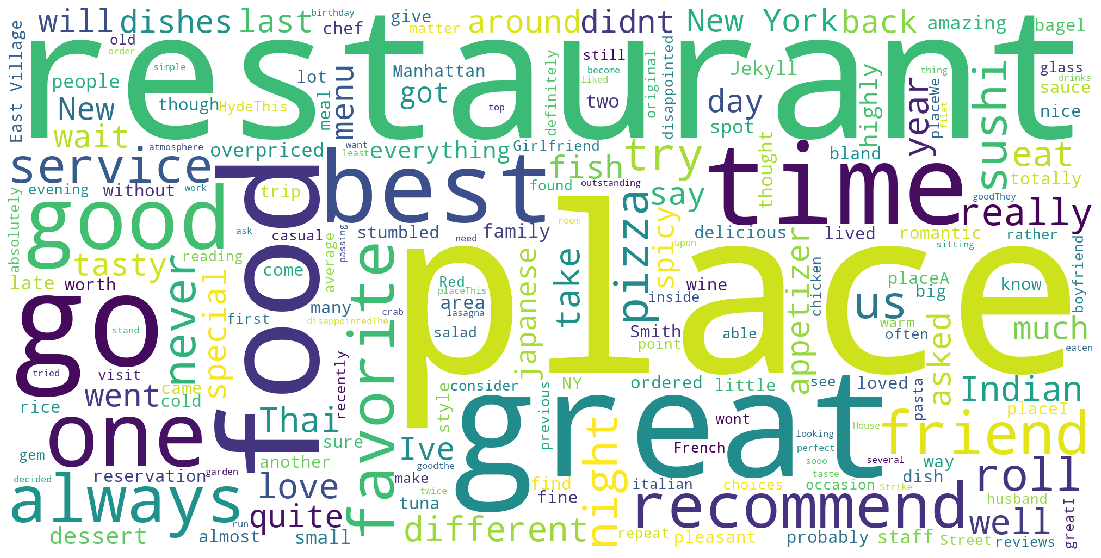

In [303]:
#WordCloud for INTP

import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

plt.figure(figsize=(20,10))

wordCloud = WordCloud(background_color="white",width=2000,height=1000,mode="RGB").generate(''.join(DataFrameDict["RESTAURANT#GENERAL"]["text"]))
plt.imshow(wordCloud)
plt.axis("off")
plt.show()

(-0.5, 1999.5, 999.5, -0.5)

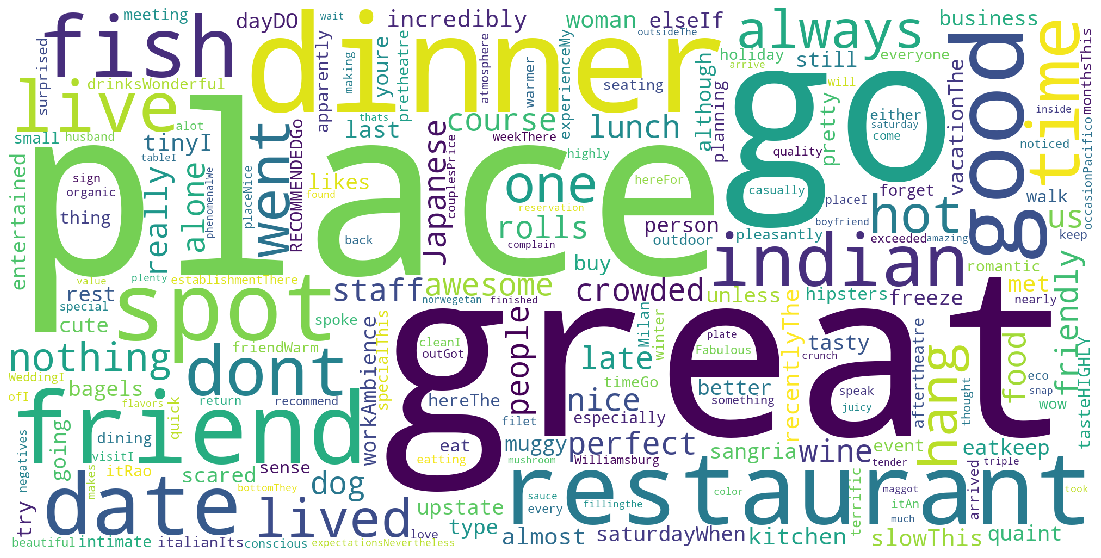

In [304]:
#WordCloud for INTP

import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

plt.figure(figsize=(20,10))

wordCloud = WordCloud(background_color="white",width=2000,height=1000,mode="RGB").generate(''.join(DataFrameDict["RESTAURANT#MISCELLANEOUS"]["text"]))
plt.imshow(wordCloud)
plt.axis("off")

In [305]:
data.shape

(1347, 9)

In [306]:
data.head()

,index,RID,SID,text,polarity,category,aspect_term,aspect_category,category_cat
0,0,1004293,1004293:0,Judging from previous posts this used to be a ...,negative,RESTAURANT#GENERAL,RESTAURANT,GENERAL,8
1,1,1004293,1004293:1,We there were four of us arrived at noon the p...,negative,SERVICE#GENERAL,SERVICE,GENERAL,11
2,2,1004293,1004293:2,They never brought us complimentary noodles ig...,negative,FOOD#QUALITY,FOOD,QUALITY,5
3,3,1004293,1004293:3,The food was lousy too sweet or too salty and ...,negative,FOOD#STYLE_OPTIONS,FOOD,STYLE_OPTIONS,6
4,6,1014458,1014458:0,I have eaten at Saul many times the food is al...,positive,FOOD#QUALITY,FOOD,QUALITY,5


In [307]:
new_data.head()

,text,category
0,judging previous posts used good place not longer,RESTAURANT#GENERAL
1,arrived noon place empty staff acted imposing ...,SERVICE#GENERAL
2,never brought complimentary noodles ignored re...,FOOD#QUALITY
3,food lousy sweet salty portions tiny,FOOD#STYLE_OPTIONS
4,eaten saul many times food always consistently...,FOOD#QUALITY


In [311]:
y_train

966      7
130      4
1743     8
158      5
188      5
159      6
556      6
1926     8
1348     5
705      0
483      1
1276     5
1425     5
1944     7
95      10
50       0
1714     6
73      11
729      8
1570     5
678      5
671      0
906      9
886     11
261     10
724      0
107      6
163      5
1613     8
336      0
448      5
970      5
3        6
865      4
273      9
258     11
1178     2
1475     8
802      5
946      6
1864     5
31       8
424     11
1176    11
1263    11
1813     6
1557     6
564      8
1674     5
770      5
77      11
1102     9
1605     8
1277     0
615      6
457     11
670     11
1826     0
1128     0
1094    11
527     11
1034     5
1317     8
1627     4
1302     6
1289     8
754      2
1535    11
1491     8
10      10
1242     8
1855    11
846      5
1053     0
1665     8
94       5
897      6
449      8
109      8
283      5
1072     5
1830     0
1860    11
1100     6
414      8
1675     6
1640    11
349     11
8        3
167     11
205      3

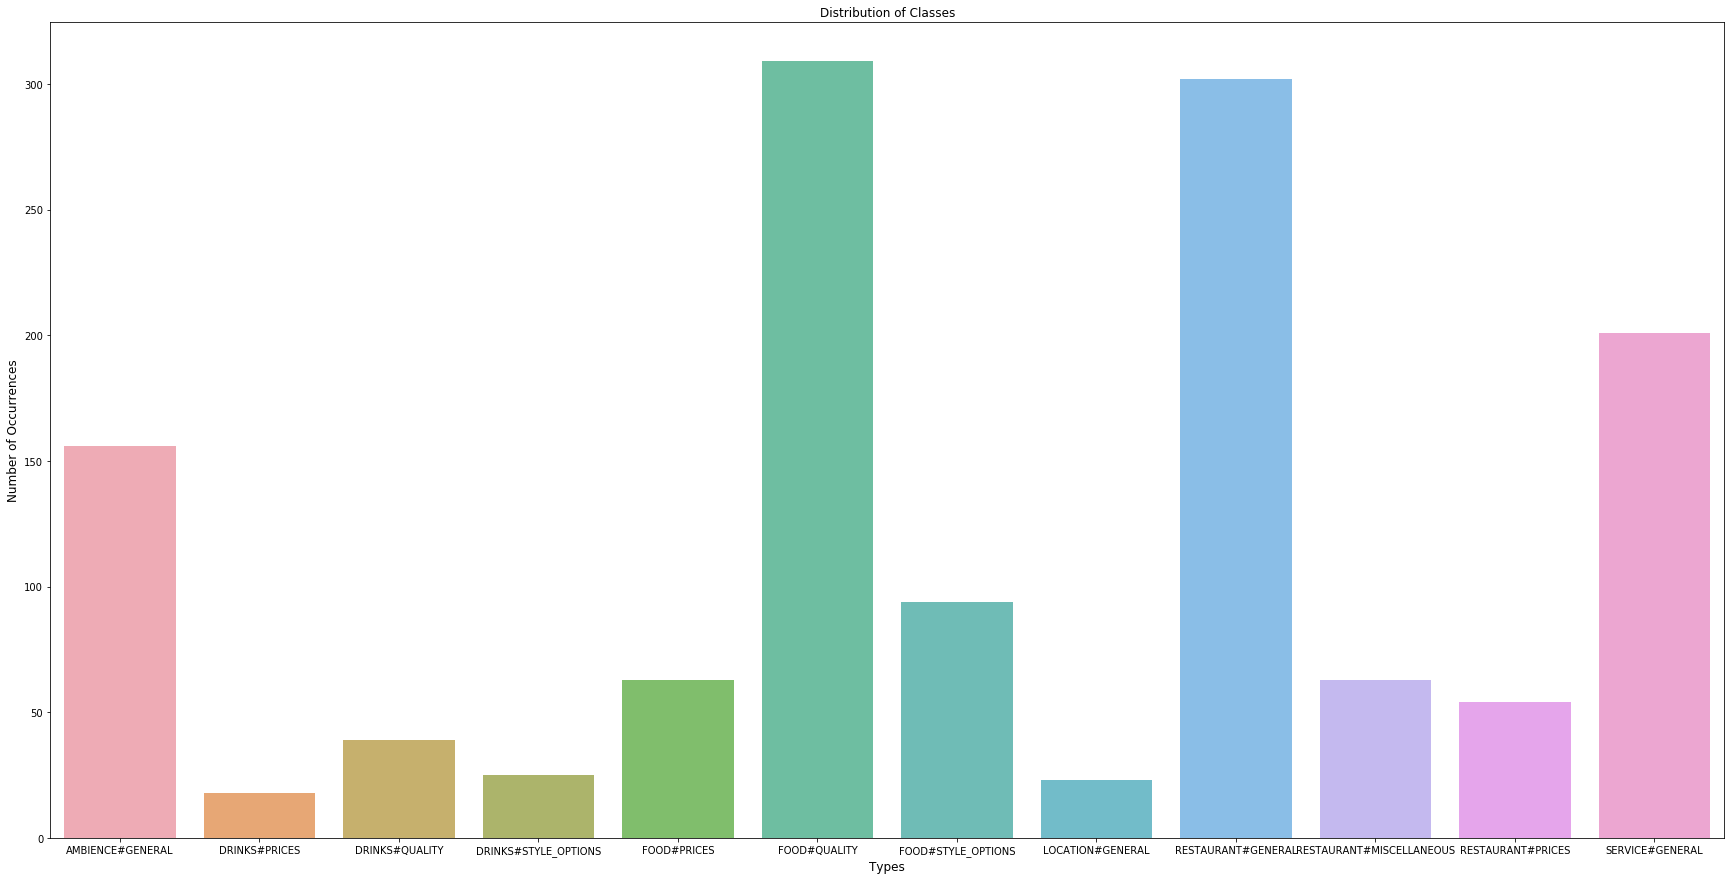

In [309]:
import seaborn as sns

cnt_types = new_data['category'].value_counts()

plt.figure(figsize=(30,15))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.title('Distribution of Classes',)
plt.show()

In [310]:
cnt_types

FOOD#QUALITY                309
RESTAURANT#GENERAL          302
SERVICE#GENERAL             201
AMBIENCE#GENERAL            156
FOOD#STYLE_OPTIONS           94
RESTAURANT#MISCELLANEOUS     63
FOOD#PRICES                  63
RESTAURANT#PRICES            54
DRINKS#QUALITY               39
DRINKS#STYLE_OPTIONS         25
LOCATION#GENERAL             23
DRINKS#PRICES                18
Name: category, dtype: int64

In [314]:
y_test.shape

(445,)

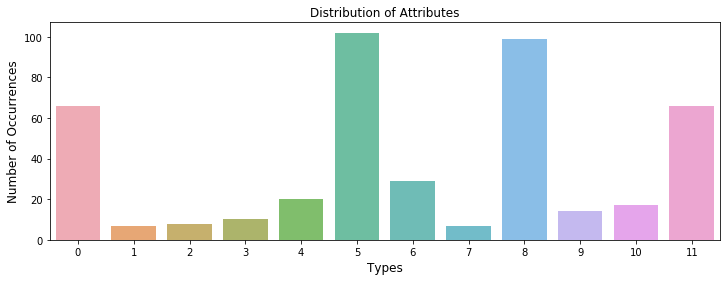

In [324]:
cnt_types = y_test.value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.title('Distribution of Attributes',)
plt.show()

In [333]:
type(svm_pred)

numpy.ndarray

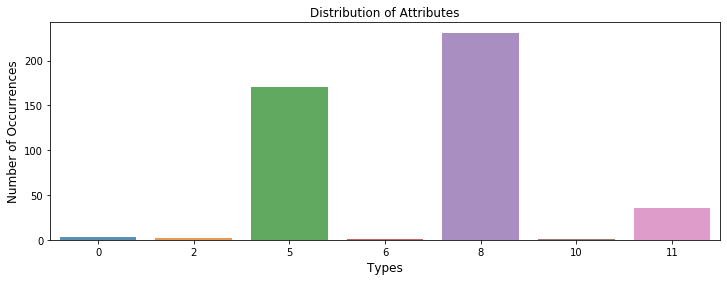

In [334]:
cnt_types = pd.Series(svm_pred).value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.title('Distribution of Attributes',)
plt.show()

In [325]:
cnt_types

5     102
8      99
11     66
0      66
6      29
4      20
10     17
9      14
3      10
2       8
7       7
1       7
Name: category_cat, dtype: int64

In [344]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_new = vectorizer.fit_transform(doc_complete)
print(vectorizer.get_feature_names())
print(X_new.shape)


['10', '100', '10piece', '11', '12', '126', '13', '15', '170', '1st', '20', '2002', '20s30', '23rd', '24', '25', '29', '30', '300', '33', '35', '36', '40', '40000', '45', '48th', '4th', '50', '500', '50th', '57th', '58', '5th', '60', '620', '65', '6th', '70', '800just', '830', '850', '895', '8pm', 'aback', 'able', 'about', 'above', 'aboveaverage', 'abrupt', 'absolutely', 'abused', 'accident', 'accidentally', 'accidently', 'accolades', 'accomodating', 'accompaniment', 'acknowledgement', 'acquiring', 'across', 'act', 'acted', 'action', 'actors', 'actually', 'add', 'additions', 'adds', 'adequately', 'adjust', 'admittedly', 'adn', 'adventure', 'advice', 'aesthetic', 'affordable', 'afortune', 'after', 'afternoon', 'aftertheatre', 'again', 'against', 'aggressively', 'ago', 'agree', 'ahhh', 'al', 'alice', 'alive', 'alked', 'all', 'allergies', 'allow', 'allowed', 'allucaneat', 'almost', 'alone', 'along', 'alot', 'alright', 'also', 'alternative', 'although', 'always', 'am', 'amanzing', 'amazed'

In [345]:
test_size = 0.33
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=test_size, random_state=seed)

In [348]:
#Fit the SVM Model
from sklearn import svm

model_new = svm.SVC(kernel = 'linear')
model_new.fit(X_train_new,y_train_new)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [349]:
svm_pred_new = model_new.predict(X_test_new)
# evaluate predictions
accuracy_new = accuracy_score(y_test_new, svm_pred_new)
print(accuracy_new)




0.2606741573033708


C:\Users\BrontoByte\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


([<matplotlib.axis.YTick at 0x15f161757b8>,
 <a list of 12 Text yticklabel objects>)

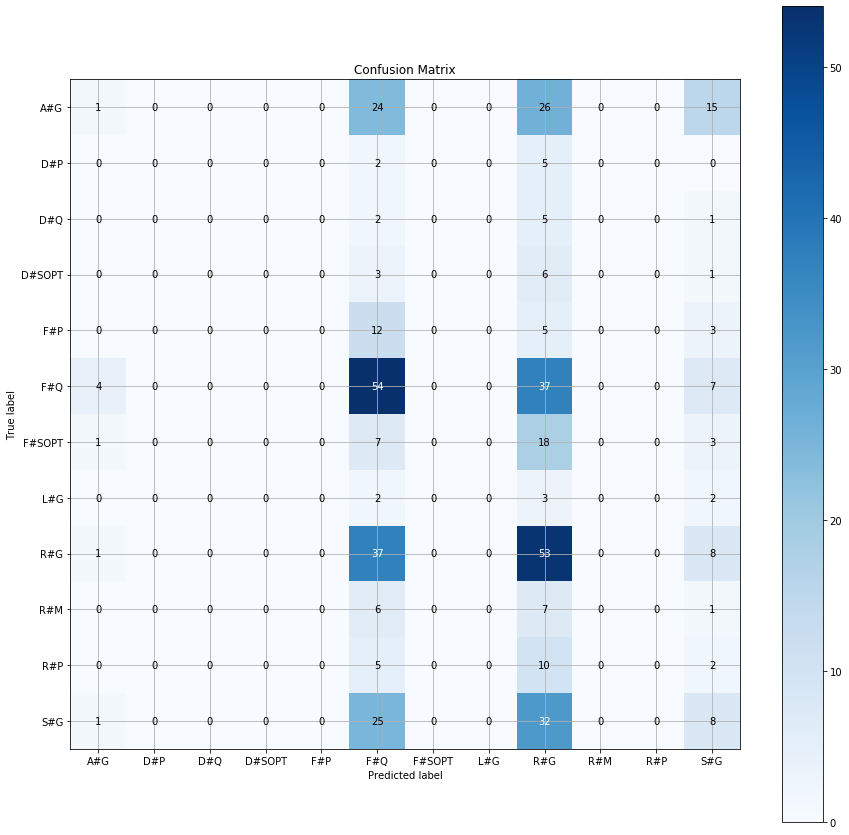

In [350]:
skplt.plot_confusion_matrix(y_test_new, svm_pred_new,figsize=(15,15))

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11],['A#G','D#P','D#Q','D#SOPT','F#P','F#Q','F#SOPT','L#G','R#G','R#M','R#P','S#G'])



In [351]:

from sklearn.metrics import classification_report
print (classification_report(y_test_new, svm_pred_new))

             precision    recall  f1-score   support

          0       0.12      0.02      0.03        66
          1       0.00      0.00      0.00         7
          2       0.00      0.00      0.00         8
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00        20
          5       0.30      0.53      0.38       102
          6       0.00      0.00      0.00        29
          7       0.00      0.00      0.00         7
          8       0.26      0.54      0.35        99
          9       0.00      0.00      0.00        14
         10       0.00      0.00      0.00        17
         11       0.16      0.12      0.14        66

avg / total       0.17      0.26      0.19       445



C:\Users\BrontoByte\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [393]:
from sklearn.multiclass import OneVsRestClassifier

C = 1.0 #SVregularization parameter
svc = svm.SVC(kernel='linear', class_weight='balanced').fit(X_train, y_train)

In [394]:
svc = svc.predict(X_test)
# evaluate predictions
svc_accuracy = accuracy_score(y_test, svc)
print(svc_accuracy)


0.24719101123595505
